# Time-Based Algorithm: blind SQL injection vulnerability detection

In this notebook, I consider the problem of blind SQL injection vulnerability detection using a custom time-based algorithm. Specifically, making mutiple requests (half with a high sleep delay and the other half with a low sleep delay) to the url being tested and comparing their RTTs to decide whether the url is vulnerable (label 1) or safe (label 0)

**Optimization:** The goal is optimize the algorithm for speed and accuracy. More speficically, it needs to have a true positive rate of less than 0.0001 (1 in 10,000) and a sleep delay that returns a RTT of less than 10 seconds on average

In [2]:
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
import csv
from statsmodels.distributions.empirical_distribution import ECDF

**Collect URLs and Response times**

In [3]:
# Helper Functions

def get_url(page_type = 'safe', page_num = 1, query = '1'):
    # Do check to make sure the URL returned is valid
    return 'http://localhost:5000/{}/{}/page?id={}'.format(page_type, page_num, query)
    
def collect_rtts(page_type, query, n_pages):
    '''
    Collects RTTS from URLs and saves them into CSV file
    '''
    
    file_name = '{}.csv'.format(page_type)
    
    with open(file_name, 'w') as file:
        writer = csv.writer(file, delimiter=',', lineterminator='\n')
        writer.writerow(['URL', 'RTT'])
        for i in range(1, n_pages+1):
            url = get_url(page_type, i, query)
            response = requests.get(url)
            row = [url, response.elapsed.total_seconds()]
            writer.writerow(row)

In [284]:
# Read data and analyze
safe_df = pd.read_csv('safe.csv')
vul_df = pd.read_csv('vulnerable.csv')

dataset_delay = pd.read_csv('dataset_100000_1.csv')
safe_delay = dataset_delay[dataset_delay['Vulnerable']==0]
vul_delay = dataset_delay[dataset_delay['Vulnerable']==1]

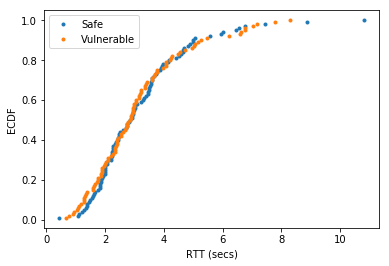

In [81]:
safe_ecdf = ECDF(safe_df['RTT'])
vul_ecdf = ECDF(vul_df['RTT'])

_ = plt.plot(safe_ecdf.x, safe_ecdf.y, marker='.', linestyle='none')
_ = plt.plot(vul_ecdf.x, vul_ecdf.y, marker='.', linestyle='none')

_ = plt.plot()

plt.legend(('Safe', 'Vulnerable'), loc='best')
_ = plt.xlabel('RTT (secs)')
_ = plt.ylabel('ECDF')



In [82]:
url = 'http://localhost:5000/vulnerable/{}/page?id='

In [286]:
safe_test_df = pd.read_csv('safe_results_10500_0.8_0.03_24_3.csv')
vul_test_df = pd.read_csv('vulnerable_results_10500_0.8_0.03_24_3.csv')
#vul_test_df_1 = pd.read_csv('vulnerable_results_10000_0.8_0.03_24_3.5.csv')

In [287]:
safe_test_df.head()

,Test Result
0,0
1,0
2,0
3,0
4,0


In [288]:
# Get False Positive Rate (FPR)
fpr = np.sum(safe_test_df['Test Result'])/safe_test_df.shape[0]

# Get False Negative Rate (FNR)
fnr = vul_test_df[vul_test_df['Test Result'] == 0].count()/vul_test_df.shape[0]

In [289]:
fpr

0.0

In [290]:
fnr

Test Result    0.093429
dtype: float64

In [291]:
safe_test_df[safe_test_df['Test Result'] == 0].count()

Test Result    10500
dtype: int64

In [292]:
safe_test_df[safe_test_df['Test Result'] == 1].count()

Test Result    0
dtype: int64

In [293]:
safe_test_df.shape

(10500, 1)

In [294]:
vul_test_df[vul_test_df['Test Result'] == 1].count()

Test Result    9519
dtype: int64

In [295]:
vul_test_df.shape

(10500, 1)

In [296]:
vul_test_df[vul_test_df['Test Result'] == 0].count()

Test Result    981
dtype: int64

In [298]:
981/10500

0.09342857142857143

In [257]:
vul_test_df_1[vul_test_df['Test Result'] == 0].count()

Test Result    1952
dtype: int64